Power for ttest= 0.794, power for mwtest= 0.995


(-14.630684909323909, 1.7897631870080335e-48)

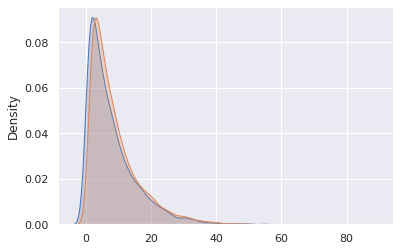

In [1]:
import numpy as np
import scipy.stats as sts
import seaborn as sns
sns.set_theme()

np.random.seed(42)
tpr_student = 0
tpr_mw = 0
for i in range(1000):
    a = sts.expon.rvs(loc=0, scale=8,  size=1000)
    b = sts.expon.rvs(loc=1, scale=8,  size=1000)
    if sts.ttest_ind(a, b)[1] < 0.05:
        tpr_student +=1
    if sts.mannwhitneyu(a, b)[1] < 0.05:
        tpr_mw +=1

print(f'Power for ttest= {tpr_student / 1000}, power for mwtest= {tpr_mw / 1000}')

_ = sns.kdeplot(sts.expon.rvs(loc=0, scale=8,  size=10000), fill=True)
_ = sns.kdeplot(sts.expon.rvs(loc=1, scale=8,  size=10000), fill=True)

from statsmodels.stats.proportion import proportions_ztest

proportions_ztest([tpr_student, tpr_mw], [1000, 1000])